# Functions and functional programming

## Introduction to functions


In R closures can be used to group multiple statements:

In [4]:
{z <- runif(1000); z <- mean(z); print(round(z, 5))}

[1] 0.49528


Round brackes are used for parenthesis to group calculations but also will return values.

In [5]:
z <- 1:10

In [6]:
(z <- 1:10)

[1]  1  2  3  4  5  6  7  8  9 10

Functions are created using the `"function"` keyword. Without an explicit `"return"` statement, the last item to be evaluated is returned.

In [1]:
# Single line functions do not require braces
sq <- function(x)x^2
print(sq(1:4))

[1]  1  4  9 16


In [2]:
# Multline function
process_string <- function(x)
{
    x <- casefold(x, upper = FALSE)
    sort(x)
}
print(names(iris))
print(process_string(names(iris)))

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     
[1] "petal.length" "petal.width"  "sepal.length" "sepal.width"  "species"     


In [3]:
# Explicit return statement, brackets around the return statement are mandatory
# Function with default parameter x
process_string <- function(x = names(iris))
{
    x <- casefold(x, upper = FALSE)
    return(sort(x))
}
print(names(iris))
print(process_string())

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     
[1] "petal.length" "petal.width"  "sepal.length" "sepal.width"  "species"     


### Variadic functions and ellipsis

R also has support for variadic functions, that is functions with any number of parameters using ellipsis `"..."`

In [4]:
# Function with 2 variables
adder <- function(x, y)
{
    x + y
}
print(adder(3, 4))

[1] 7


In [5]:
# Variadic function
adder_variadic <- function(...)
{
    x <- c(...)
    result <- 0
    while(length(x) > 0)
    {
        result <- result + x[1]
        x <- x[-1]
    }
    return(result)
}
print(adder_variadic(1, 2, 3, 4))

[1] 10


In [6]:
# Variadic function with one regular parameter
adder_variadic2 <- function(square = FALSE, ...)
{
    x <- c(...)
    if(square)
        x <- x^2
    result <- 0
    while(length(x) > 0)
    {
        result <- result + x[1]
        x <- x[-1]
    }
    return(result)
}
print(adder_variadic2(1, 2, 3, 4))

[1] 29


Ellipsis can also be used to pass parameters from the top level function:

In [7]:
adder_variadic3 <- function(message, ...)
{
    cat(message, "\n")
    adder_variadic(...)
}
print(adder_variadic3("Sum: ", 1, 2, 3, 4))

Sum:  
[1] 10


### Operators as functions

Operators in R are functions and can be called by using the back-tick operator:

In [8]:
print(`+`(2, 3))

[1] 5


In [9]:
print(`*`(3, 4))

[1] 12


# Exercise 1.13

**Question 1**

Functions can be passed as parameters into other functions. Create a function called `proc` that takes three parameters. The first parameter of the function is a vector `x`, the second a function `fun`, and the third ellipsis `...`

The function `proc` should return `x` after it has been processed by the function `fun`. The ellipsis `...` should be passed to the function `fun`.

**Question 2**

Using the `proc` function pass the `"Sepal.Width"` column from `"iris"` table to the `"x"` parameter and the `"mean"` function to the `"fun"` parameter.

**Question 3**

Repeat the above task but use the vector `c(1, 2, 44, NA, 5, 6)` instead. Why do you get that answer? Try again but pass the parameter `"na.rm = TRUE"` with the ellipsis. What happened and how did it occur?

**Question 4**

R has **anonymous functions** that are functions that can be declared but not bound to a name. Instead of using the `"mean"` function create a function $mean(x^2) - mean(x)^2$ in its place and sample 100 numbers from the uniform [0,1] distribution as the `"x"` parameter.

**Question 5**

The main difference between environments and lists and data.frames is that environments are reference objects, that is environments are not value objects. Create a function called `"makeX"` that has one parameter `y` populates it by binding a variable `x` which is a vector of 20 numbers sampled from the unform [-3, 3] distribution and returns y invisibly `invisible(y)`. Now create an empty list called `list1` and an empty environment called `env1`. Pass `list1` and `env1` separately through the `makeX` function. Is there any change in `env1` and `list1`? What does this imply about how R functions pass parameters?

**Question 6**

Use the back-tick operator to use `"^"` to calculate $2^3$

## Recursive functions

Recursive functions call themselves and R has support for these types of constructs:

In [10]:
# The factorial function
fact <- function(x)
{
    if(x == 0)
        return(1)
        
    return(x*fact(x - 1))
}

print(fact(10))
# The R version
print(factorial(10))

[1] 3628800
[1] 3628800


## Lists of functions

As previously discussed, R's list type can contain any type, this includes functions.

In [11]:
summ <- list("min" = min,
             "mean" = mean,
             "median" = median,
             "max" = max,
              "sd" = sd)
print(summ)

$min
function (..., na.rm = FALSE)  .Primitive("min")

$mean
function (x, ...) 
UseMethod("mean")
<bytecode: 0x33aa8d0>
<environment: namespace:base>

$median
function (x, na.rm = FALSE) 
UseMethod("median")
<bytecode: 0x2a832d8>
<environment: namespace:stats>

$max
function (..., na.rm = FALSE)  .Primitive("max")

$sd
function (x, na.rm = FALSE) 
sqrt(var(if (is.vector(x) || is.factor(x)) x else as.double(x), 
    na.rm = na.rm))
<bytecode: 0x33ab170>
<environment: namespace:stats>



# Exercise 1.14

**Question 1**

Write a function called `fapply` that takes `funs` as its first parameter, and `x` as its second. The parameter `funs` is a list of functions of arbitrary length and `x` is a numeric vector. The `fapply` function processes `x` with each function and output a list of vectors, each processed with each of the `funs` functions. Now use `fapply` to process `100` numbers generated from the standard normal distribution where `funs` is the `summ` list we generated in the exercise.

## Functional programming constructs in R


Functional programming constructions, `Map`, `Reduce`, `Filter`, `Find`, `Negate`, `Position`, as well as some R variants `lapply`, `sapply`, `vapply`, `mapply`, `apply`, `replicate` and `sweep` are available in R.

### R's `apply` functions

The `lapply` function applies a function to each element of a list or vector. It is called lapply because it returns a list of outputs:

In [12]:
# Apply the mean function to the first four columns of the iris dataset
print(lapply(iris[, 1:4], mean))

$Sepal.Length
[1] 5.843333

$Sepal.Width
[1] 3.057333

$Petal.Length
[1] 3.758

$Petal.Width
[1] 1.199333



The `sapply` function is exactly the same except that it attempts to simplify the output:

In [13]:
# Output is simplyfied to a named list
print(sapply(iris[, 1:4], mean))

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333 


The `vapply` function has a parameter for specifying the output type:

In [14]:
# Specifying parameter output by an actual value
print(vapply(iris[, 1:4], mean, 0))

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333 


Sometimes, you want to apply a function to more than one list of arguments, this is what the `mapply` function is for:

In [15]:
# Sampling normal distributions with different means and variances
print(mapply(rnorm, n = list(4, 4, 4), mean = c(2, 10, 30), sd = c(1, 3, 5)))

          [,1]     [,2]     [,3]
[1,] 2.5687555 1.463446 37.79988
[2,] 1.0184957 9.053280 34.06894
[3,] 2.1298400 5.223695 22.37991
[4,] 0.5013421 8.847315 24.90917


The `replicate` function replicates an expression a specified number of times. It is useful when you don't necessarily need to write a function or process a vector or list:

In [16]:
# Calculate the mean of sampled numbers from a normal distribution
#    replicated 10 times ...
print(replicate(10, mean(rnorm(100, 2, 4))))

 [1] 2.142466 2.120434 2.140203 1.258743 2.460834 2.257963 2.114862 1.734306
 [9] 1.687769 2.052876


The `apply` function applies functions to dimensions of matrices, arrays, and data.frames. ***One easy way of remembering which indicies to aggregate over is that you have to specify the dimensions that you want to keep***:

In [17]:
# Take the mean of the columns of the numeric columns of the iris table
print(apply(iris[,1:4], 2, mean))

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333 


In [18]:
# The titanic data set:
Titanic

, , Age = Child, Survived = No

      Sex
Class  Male Female
  1st     0      0
  2nd     0      0
  3rd    35     17
  Crew    0      0

, , Age = Adult, Survived = No

      Sex
Class  Male Female
  1st   118      4
  2nd   154     13
  3rd   387     89
  Crew  670      3

, , Age = Child, Survived = Yes

      Sex
Class  Male Female
  1st     5      1
  2nd    11     13
  3rd    13     14
  Crew    0      0

, , Age = Adult, Survived = Yes

      Sex
Class  Male Female
  1st    57    140
  2nd    14     80
  3rd    75     76
  Crew  192     20


In [19]:
# The dimensions of the Titanic table
print(dim(Titanic))

[1] 4 2 2 2


In [20]:
# Display the table for all the people that survived
print(apply(Titanic[, , , 2], 1:2, sum))

      Sex
Class  Male Female
  1st    62    141
  2nd    25     93
  3rd    88     90
  Crew  192     20


The `sweep` function allows statistics to be swept over matrices, and arrays:

In [1]:
# De-mean the numeric columns of the iris data.frame
# displaying only the first four rows
print(sweep(iris[1:4,1:4], 2, apply(iris[,1:4], 2, mean), FUN = "-"))

  Sepal.Length Sepal.Width Petal.Length Petal.Width
1   -0.7433333  0.44266667       -2.358  -0.9993333
2   -0.9433333 -0.05733333       -2.358  -0.9993333
3   -1.1433333  0.14266667       -2.458  -0.9993333
4   -1.2433333  0.04266667       -2.258  -0.9993333


There are other less common `apply` functions: `eapply` applies a function to each element in an environment, `rapply` is a recursive version of `lapply`, `tapply` applies a function to each element of a ragged array according to a list of factors. The `by` function can also be very useful for applying functions to subsets of a `data.frame`.

### Familiar functional constructs

Familiar functional programming constructs `Map, Reduce, Filter, Position, Negate` functions are also supported by R

The `Map` function is similar to `lapply`, it applies a function to lists or vectors. It returns a list

In [22]:
# Simple map example
print(Map(sqrt, 1:4))

[[1]]
[1] 1

[[2]]
[1] 1.414214

[[3]]
[1] 1.732051

[[4]]
[1] 2



In [23]:
# A more involved example ...
# The split function splits items by a factor and returns a list:
section_mean <- Map(function(x)apply(x[, 1:4], 2, mean), split(iris, iris$Species))
print(section_mean)

$setosa
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.006        3.428        1.462        0.246 

$versicolor
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.936        2.770        4.260        1.326 

$virginica
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       6.588        2.974        5.552        2.026 



The `Reduce` function reduces a list of argument according to a function:

In [24]:
print(Reduce(`+`, as.list(1:5)))

[1] 15


In [25]:
print(Reduce(rbind, section_mean))

     Sepal.Length Sepal.Width Petal.Length Petal.Width
init        5.006       3.428        1.462       0.246
            5.936       2.770        4.260       1.326
            6.588       2.974        5.552       2.026


In [26]:
# The do.call function is similar to a Reduce function ...
# The rbind function binds tables together by row
print(do.call(rbind, section_mean))

           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026


The filter function allows us to apply filters to vectors using a predicate function:

In [27]:
x <- sample(1:10, 30, T)
print(x)

 [1]  2  6  4  3  6  2  1  3  7  1  2  7 10 10 10  9 10  5 10  4  5  1  2  9  8
[26]  2 10  7 10  7


In [28]:
# Selects only items that are less than 5
print(Filter(function(x)x < 5, x))

 [1] 2 4 3 2 1 3 1 2 4 1 2 2


The `Position` function returns the first or last position of the element that matches the predicate:

In [29]:
# Match the first position where 5 occurs
print(Position(function(x) x == 5, x, right = FALSE))

[1] 18


In [30]:
# Match the last position where 5 occurs
print(Position(function(x) x == 5, x, right = TRUE))

[1] 21


The `Negate` function negates the effect of the given predicte:

In [31]:
# Gets the first element that negates the predicate
print(Position(Negate(function(x) x <= 5), x, right = FALSE))

[1] 2


# Exercise 1.15

**Question 1**

Use the `Filter` function to create a vector from from the `Sepal.Length` column in the `iris` table that has length greater than its mean.

**Question 2**

Use the `apply` function to obtain the ratio between the passengers that survived and those that did not by `Class` and `Sex` in the `Titanic` dataset. Hint, you'll first need to apply `sum` over indices you want to keep, then divide two remaining sub-arrays by each other to obtain proportions.

**Question 3**

The `prop.table` function allows you to calculate proportions in count tables. Repeat the calculation in **Question 2** except instead of dividing the two arrays use the `apply` and `prop.table` function to generate proportions. Hint: search R Help for the `prop.table` function you will need to specify indices to take proportions over. First `apply` keeping the `c(1, 2, 4)` dimensions, and then do the prop.table keeping dimensions `c(1, 2)`.

**Question 4**

Use the `split` function to split the numeric columns of the `iris` dataset by `Species`. Then use the `lapply` function to calculate the covariance matrix (`var`) and the correlation matrix (`cor`) of each sub-table in the list. Hint: you'll need to apply lapply twice, once for the correlation, another for the variance.

In [ ]:
# Check this question!

**Question 5**

Carry out the same calculations specified in **Question 4** using the `Map` function instead of `lapply`.

**Question 6**

The function below `bind3` binds two arrays together along the 3rd dimension. Use the `Reduce` function to create a multi-dimensional array by applying the `bind3` function below to the output of **Question 5**.

In [32]:
bind3 <- function(.x, .y)
{
    .dim <- 3
    .dimX <- dim(.x)
    .out <- as.vector(c(.x, .y))
    if(length(.dimX) < .dim)
        dim(.out) <- c(.dimX, 2)
    else{
        .dimX[3] <- .dimX[3] + 1
        dim(.out) <- .dimX
    }
    return(.out)
}

## Pipelining/UFCS and magrittr

Pipelining functions is part of functional programming style this is accomplished using a construction known as uniform function call syntax (UFCS) that allows the first parameter of a function to be called inserted into by the preceeding item separated by an operator.

### User specified operators

In R, operators in the form `"%X%"` can be created where `"X"` is specified by the user. The magrittr package defines a pipeline operator `"%>%"` here is a **simplified** version:

In [33]:
# Pipeline operator
`%>%` <- function(x, fun)fun(x)

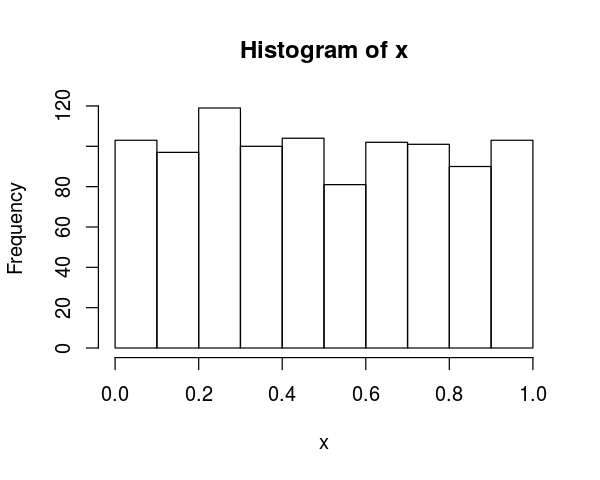

In [34]:
options(repr.plot.width = 5, repr.plot.height = 4)
# Example plotting a histogram of random generated numbers
1E3 %>% runif %>% hist
# Standard call
# hist(runif(1E3))

In [35]:
rm(`%>%`)

Of course `magrittr` offers many more features for instance being able to add arguments to functions. Below we replicate a previous example using `magrittr's` pipe operator. Some say that this style is easier to reason about and clearer.

In [36]:
require(magrittr)

Loading required package: magrittr


In [37]:
section_mean <- iris %>% split(., iris$Species) %>% 
                   Map(function(x)apply(x[,1:4], 2, mean), .)
section_mean %>% print

$setosa
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.006        3.428        1.462        0.246 

$versicolor
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       5.936        2.770        4.260        1.326 

$virginica
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       6.588        2.974        5.552        2.026 



# Exercise 1.16

Repeat all of exercises 1.15 using `magrittr's` pipe operator.